In [1]:
from simulation import Simulation
from rules_interpreter import *
from agents import Agente
from market  import Market
from market  import Cryptocurrency
from utils import *

In [2]:
# Ejemplo de creación de agentes y simulación
pertenencia_map = {
    "Bitcoin": {
        "precio": {
            "bajo": lambda precio: pertenencia_precio_bajo(precio, limite_inferior=15000, limite_superior=30000),
            "medio": lambda precio: pertenencia_precio_medio(precio, limite_inferior=30000, limite_superior=45000),
            "alto": lambda precio: pertenencia_precio_alto(precio, limite_inferior=45000, limite_superior=60000)
        },
        "volumen": {
            "bajo": lambda volumen: pertenencia_volumen_bajo(volumen, limite_inferior=1000, limite_superior=5000),
            "medio": lambda volumen: pertenencia_volumen_medio(volumen, limite_inferior=5000, limite_superior=10000),
            "alto": lambda volumen: pertenencia_volumen_alto(volumen, limite_inferior=10000, limite_superior=15000)
        },
        "sentimiento": {
            "negativo":lambda sentimiento: pertenencia_sentimiento_negativo,
            "neutro": lambda sentimiento: pertenencia_sentimiento_neutro,
            "positivo": lambda sentimiento: pertenencia_sentimiento_positivo
        }
    },
    "Ethereum": {
        "precio": {
            "bajo": lambda precio: pertenencia_precio_bajo(precio, limite_inferior=1000, limite_superior=2000),
            "medio": lambda precio: pertenencia_precio_medio(precio, limite_inferior=2000, limite_superior=3000),
            "alto": lambda precio: pertenencia_precio_alto(precio, limite_inferior=3000, limite_superior=5000)
        },
        "volumen": {
            "bajo": lambda volumen: pertenencia_volumen_bajo(volumen, limite_inferior=1000, limite_superior=5000),
            "medio": lambda volumen: pertenencia_volumen_medio(volumen, limite_inferior=5000, limite_superior=10000),
            "alto": lambda volumen: pertenencia_volumen_alto(volumen, limite_inferior=10000, limite_superior=15000)
        },
        "sentimiento": {
            "negativo": lambda sentimiento: pertenencia_sentimiento_negativo,
            "neutro": lambda sentimiento: pertenencia_sentimiento_neutro,
            "positivo": lambda sentimiento: pertenencia_sentimiento_positivo
        }
    }
}

In [3]:
# Simulación del mercado
btc=Cryptocurrency("Bitcoin",30000.0,0.9)
market=Market([btc])

# Cargar reglas desde archivos de texto
rules_buy_low_sell_high = load_rules_from_file('rules_buy_low_sell_high.txt')
rules_momentum = load_rules_from_file('rules_momentum.txt')


rule_interpreter = ParserReglas(pertenencia_map)

# Crear brokers con diferentes estrategias
brokers = [
    Agente('Broker 1', rules_buy_low_sell_high,rule_interpreter),
    Agente('Broker 2', rules_momentum,rule_interpreter),
    Agente('Broker 3', rules_momentum,rule_interpreter),
    Agente('Broker 4', rules_buy_low_sell_high,rule_interpreter),
    Agente('Broker 5', rules_buy_low_sell_high,rule_interpreter)
]

simulation = Simulation(1000,brokers,market,rule_interpreter)
#print("market.cryptocurrencies")
#print(simulation.market.cryptocurrencies)
#print(simulation.sentiment_history)
simulation.run()

Broker 1 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
mantener
30000.0
100000
Broker 2 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
vender
30000.0
100000
Broker 2 no tiene unidades de Bitcoin para vender.
Broker 3 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
comprar
30000.0
100000
Broker 3 compró 3.0 unidades de Bitcoin a 30000.00 USD cada una.
Broker 4 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
vender
30000.0
100000
Broker 4 no tiene unidades de Bitcoin para vender.
Broker 5 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
mantener
30000.0
100000
Actualizando el mercado en 2024-09-17 17:31:17...
Trades en Bitcoin: []
Step 0: Timestamp = 2024-09-17 17:32:17.033165
  Bitcoin: Price = $30001.57
Broker 1 decidió: La regla sugiere no mantener en este contexto.
********* EJECU

In [4]:
for crypto, prices in simulation.price_history.items():
    print(f'{crypto}------{prices}')

Bitcoin------[30000.0, 30001.572575165268, 30001.569055947686, 30001.566218761276, 30001.86300999976, 30002.15757156405, 30002.146749918043, 30002.133818600323, 30002.42788615784, 30002.73141098303, 30002.73144600712, 30003.023282276747, 30003.31610143455, 30003.30686190486, 30003.605458007554, 30004.197646891273, 30004.504809478723, 30005.11361257554, 30005.127287368385, 30005.12728776107, 30006.031537798775, 30006.010916990326, 30006.603626390777, 30006.601707501606, 30006.913542698825, 30007.51836996402, 30007.831173919254, 30007.812895200208, 30007.813211085973, 30007.801885995745, 30007.798879193175, 30007.80266766719, 30007.82325339053, 30008.13367740565, 30008.744169548743, 30009.03697588919, 30009.64216055707, 30009.643984518592, 30009.64687313057, 30010.25424926105, 30010.247979696196, 30010.564028754823, 30010.5622701976, 30011.169598106673, 30011.161846143787, 30011.180293620404, 30011.784725636036, 30012.392971400986, 30012.696076810727, 30012.989232398137, 30013.5903349802

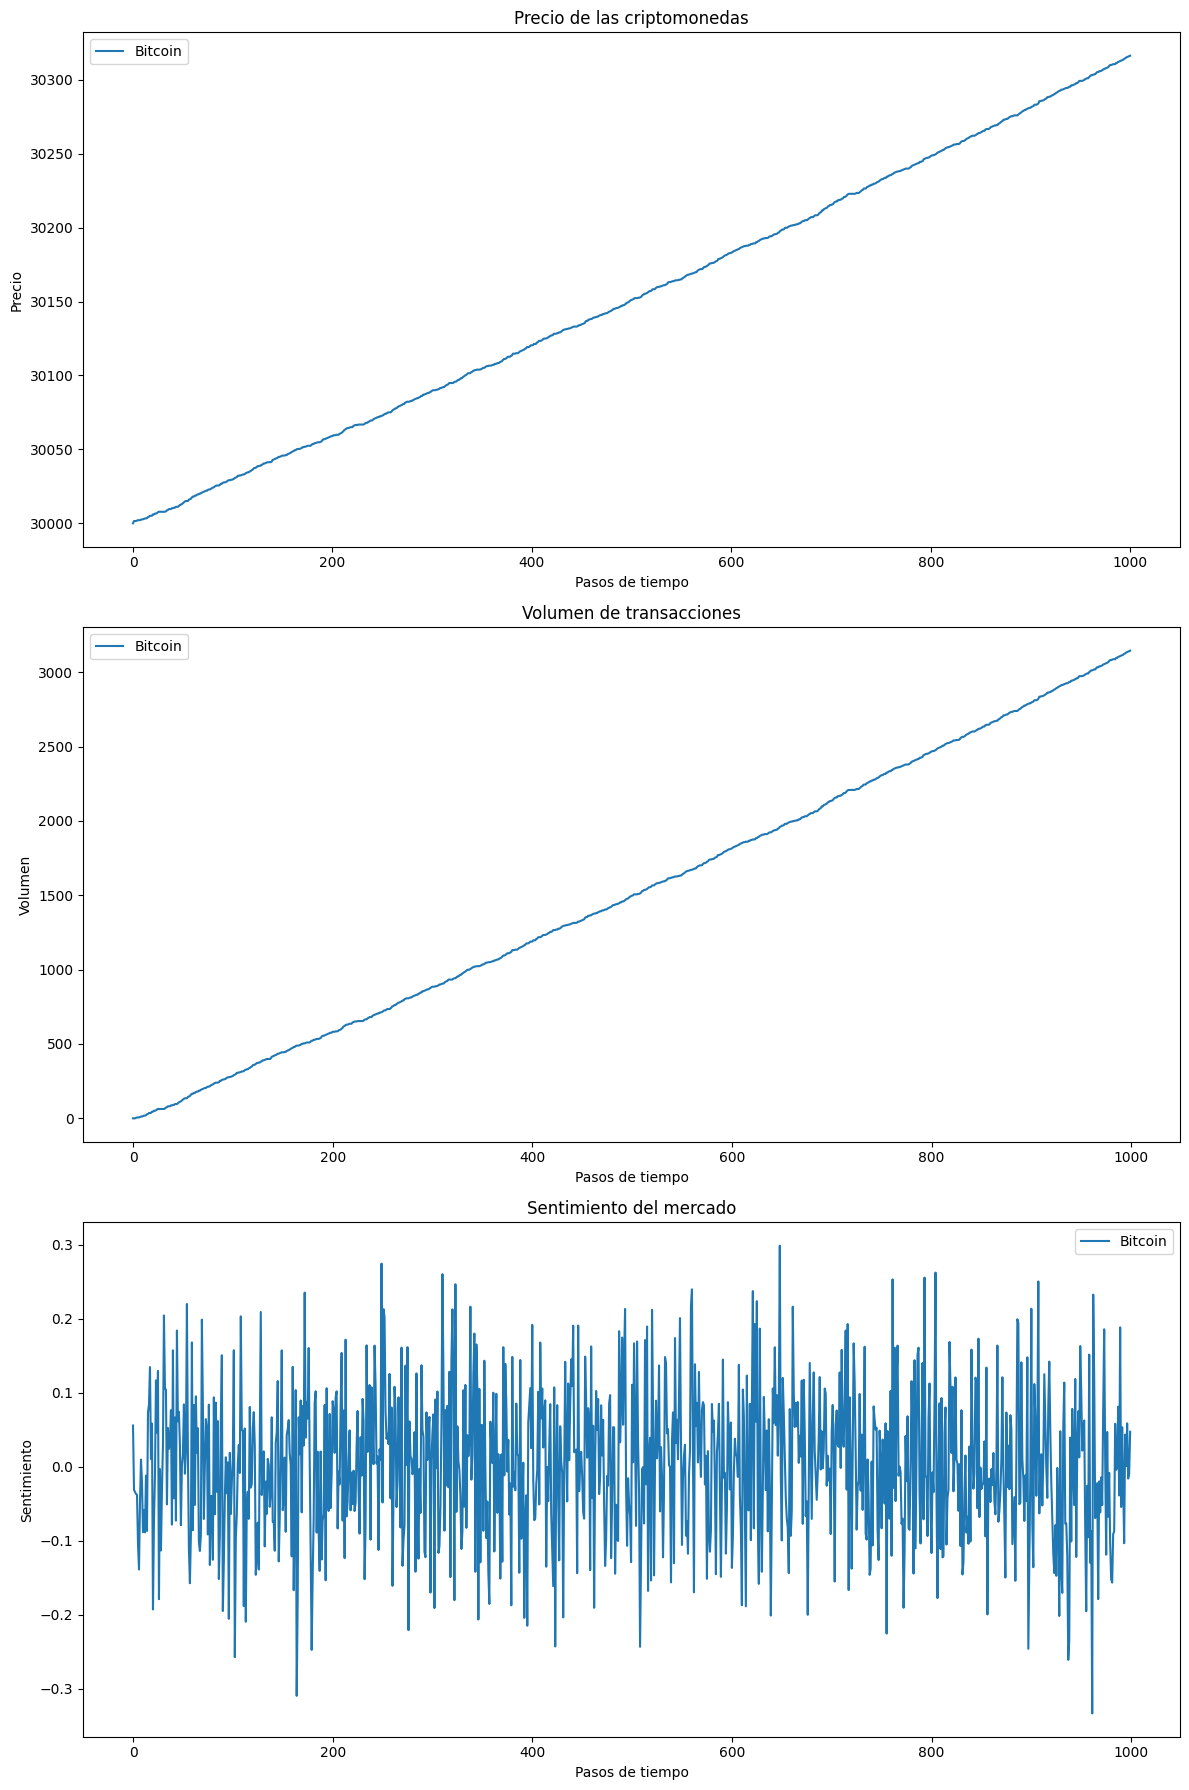

In [5]:
simulation.plot_results()

In [6]:
simulation.get_summary()
simulation.get_performance()

Resumen de la simulación:
Bitcoin:
  initial_price: 30000.0
  final_price: 30316.243262991768
  price_change: 1.0541442099725584
  max_price: 30316.243262991768
  min_price: 30000.0
  total_volume: 1517589.0

Rendimiento de los agentes:
agente 0 generación 99:
  initial_value: 10000000.00%
  final_value: 535.79%
  performance: -9999.46%
  max_performance: 53578.57%
  min_performance: 0.00%
  avg_performance: 24971.95%
agente 2 generación 99:
  initial_value: 10000000.00%
  final_value: 447.62%
  performance: -9999.55%
  max_performance: 44762.14%
  min_performance: 0.00%
  avg_performance: 16059.04%
agente 3 generación 99:
  initial_value: 10000000.00%
  final_value: 536.24%
  performance: -9999.46%
  max_performance: 53623.98%
  min_performance: 0.00%
  avg_performance: 33967.46%

La estrategia más efectiva fue: agente 3 generación 99




'agente 3 generación 99'